In [ ]:
import numpy as np
from keras import datasets
from keras import models,layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras

# 1. DataLoader
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

모델링 순서
1) 데이터셋 생성
2) 시퀀스 모델 생성
3) 전처리
4) compile
5) fit()
6) predict()
7) evaluate()

In [ ]:
print(X_train[200])
print(y_train[200])

모델에 데이터 입력하기 전에 
<br>
1) 255로 나누고
<br>
2) 한줄로 데이터를 펼쳐서 입력

In [ ]:
## 전처리 과정
print(X_train.shape) # channel 수가 흑백이라서 1이라서 표시 안됨!
L,H,W = X_train.shape
# 1) 1차원으로 돌리는 과정
X_train = X_train.reshape(-1,H * W)
X_test = X_test.reshape(-1,H * W)

print(X_train.shape)
print(X_test.shape)

# 2) 255로 나눈다.
X_train = X_train /255
X_test = X_test /255
#print(X_train[0])

# 3) y값 전처리하기...One Hot Encoding -> keras에서 사용
Y_train = np_utils.to_categorical(y_train) # 앞 문자를 대문자로 바꿨다..전처리 했다.
Y_test = np_utils.to_categorical(y_test)

print(Y_train[0])

하이퍼파라미터 지정한 후 모델 생성

In [ ]:
input = 28*28
unit = 100
numClasses = 10
epochs = 10
bSize = 100

# 모델 생성
model = models.Sequential()
model.add(layers.Dense(unit,activation="relu",input_shape=(input,))) # 출력, 입력(입력은 처음에만 사용)
model.add(layers.Dense(numClasses,activation="softmax"))

# compile
model.compile("sgd","categorical_crossentropy","accuracy")

# fit()
model.fit(X_train, Y_train, epochs=10, batch_size=bSize, validation_split=0.2)

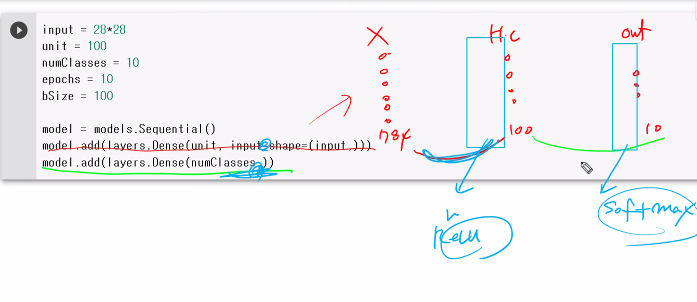

In [ ]:
# Evaluation
model_performance = model.evaluate(X_test, Y_test, batch_size = bSize)
print("Loss:{}, Accuracy:{}".format(*model_performance))

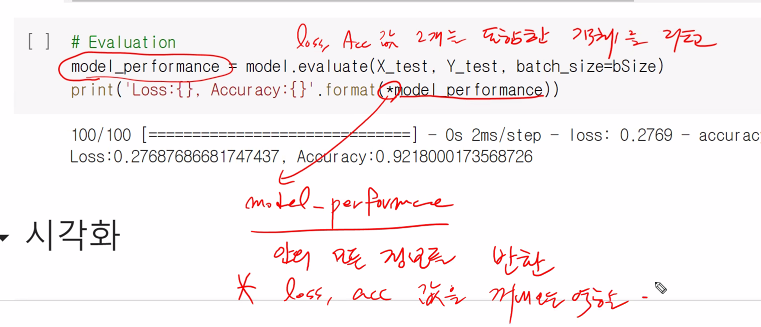

## 시각화

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history["loss"]) # history 안에 history에 들어가야 dict값을 받을 수 있음
    plt.plot(history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train","Validation"])

def plot_acc(history):
    plt.plot(history.history["accuracy"]) # history 안에 history에 들어가야 dict값을 받을 수 있음
    plt.plot(history.history["val_accuracy"])
    plt.title("Model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train","Validation"])

# fit...학습할 때 나오는 로그메시지들을 다 모아서 리턴한다...history
history = model.fit(X_train, Y_train, epochs= 50, batch_size=bSize, validation_split=0.2)


In [ ]:
plot_loss(history)

In [ ]:
plot_acc(history)